## 데이터 로드

In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [2]:
# 온라인 구매 이력
# 날짜, 성별, 연령대, 큰 카테고리, 작은 카테고리, 구매량
buy2018_1 = pd.read_csv('../data/buy2018_1.csv', encoding='cp949')
buy2018_2 = pd.read_csv('../data/buy2018_2.csv', encoding='cp949') 
buy2019_1 = pd.read_csv('../data/buy2019_1.csv', encoding='cp949') 
buy2019_2 = pd.read_csv('../data/buy2019_2.csv', encoding='cp949')

buy2018_1 = buy2018_1.iloc[:,1:]
buy2018_2 = buy2018_2.iloc[:,1:]
buy2019_1 = buy2019_1.iloc[:,1:]
buy2019_2 = buy2019_2.iloc[:,1:]

buy2018_1.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']
buy2018_2.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']
buy2019_1.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']
buy2019_2.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']

In [81]:
buy_full = pd.concat([buy2018_1, buy2018_2, buy2019_1, buy2019_2], axis=0)
buy_full = buy_full.reset_index(drop=True)
buy_full['year'] = buy_full['date'].apply(lambda x : int(str(x)[:4]))
buy_full['month'] = buy_full['date'].apply(lambda x : int(str(x)[4:6]))
buy_full['day'] = buy_full['date'].apply(lambda x : int(str(x)[6:]))
buy_full['date'] = buy_full.apply(lambda x : datetime.date(x['year'], x['month'], x['day']), axis=1)
buy_full['weekday'] = buy_full['date'].apply(lambda x : datetime.date.weekday(x))
buy_full

,date,sex,age,big_cat,sm_cat,qty,year,month,day,weekday
0,2018-01-01,F,20,식품,가공란,37,2018,1,1,0
1,2018-01-01,F,30,식품,가공란,16,2018,1,1,0
2,2018-01-01,F,40,식품,가공란,9,2018,1,1,0
3,2018-01-01,F,50,식품,가공란,3,2018,1,1,0
4,2018-01-01,M,20,식품,가공란,13,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2056894,2019-12-31,M,20,냉난방가전,히터,8,2019,12,31,1
2056895,2019-12-31,M,30,냉난방가전,히터,22,2019,12,31,1
2056896,2019-12-31,M,40,냉난방가전,히터,38,2019,12,31,1
2056897,2019-12-31,M,50,냉난방가전,히터,23,2019,12,31,1


In [4]:
buy_full.big_cat.value_counts()

식품       1229819
뷰티        697853
냉난방가전     129227
Name: big_cat, dtype: int64

In [276]:
buy_full.sm_cat.value_counts()[-10:]

에어커튼            280
향수세트            252
난방용 열풍기         181
기능성 화이트닝 화장품    167
가스온수기           136
중대형 에어컨         119
산림욕기            105
남성향수             76
색조 메이크업 세트       76
여성향수             11
Name: sm_cat, dtype: int64

In [6]:
# 소셜 데이터 
# 날짜, 큰 카테고리, 작은 카테고리, 구매량
sns2018_1 = pd.read_csv('../data/sns2018_1.csv', encoding='cp949') 
sns2018_2 = pd.read_csv('../data/sns2018_2.csv', encoding='cp949') 
sns2019_1 = pd.read_csv('../data/sns2019_1.csv', encoding='cp949') 
sns2019_2 = pd.read_csv('../data/sns2019_2.csv', encoding='cp949')

sns2018_1 = sns2018_1.iloc[:,1:]
sns2018_2 = sns2018_2.iloc[:,1:]
sns2019_1 = sns2019_1.iloc[:,1:]
sns2019_2 = sns2019_2.iloc[:,1:]

sns2018_1.columns = ['date', 'big_cat', 'sm_cat', 'cnt']
sns2018_2.columns = ['date', 'big_cat', 'sm_cat', 'cnt']
sns2019_1.columns = ['date', 'big_cat', 'sm_cat', 'cnt']
sns2019_2.columns = ['date', 'big_cat', 'sm_cat', 'cnt']

In [83]:
sns_full = pd.concat([sns2018_1, sns2018_2, sns2019_1, sns2019_2], axis=0)
sns_full = sns_full.reset_index(drop=True)
sns_full['year'] = sns_full['date'].apply(lambda x : int(str(x)[:4]))
sns_full['month'] = sns_full['date'].apply(lambda x : int(str(x)[4:6]))
sns_full['day'] = sns_full['date'].apply(lambda x : int(str(x)[6:]))
sns_full['date'] = sns_full.apply(lambda x : datetime.date(x['year'], x['month'], x['day']), axis=1)
sns_full

,date,big_cat,sm_cat,cnt,year,month,day
0,2018-01-01,뷰티,기능성 링클케어 화장품,12.154295,2018,1,1
1,2018-01-01,뷰티,기능성 모공관리 화장품,36.000828,2018,1,1
2,2018-01-01,뷰티,기능성 아이케어 화장품,0.895782,2018,1,1
3,2018-01-01,뷰티,기능성 영양보습 화장품,14.868175,2018,1,1
4,2018-01-01,뷰티,기능성 트러블케어 화장품,48.819391,2018,1,1
...,...,...,...,...,...,...,...
279585,2019-12-31,냉난방가전,가스온수기,0.084023,2019,12,31
279586,2019-12-31,냉난방가전,산림욕기,0.172214,2019,12,31
279587,2019-12-31,냉난방가전,에어커튼,0.336094,2019,12,31
279588,2019-12-31,냉난방가전,신발건조기,1.224592,2019,12,31


In [85]:
data = buy_full.merge(sns_full, on=['date', 'year', 'month', 'day', 'big_cat', 'sm_cat'], how='left')
data

,date,sex,age,big_cat,sm_cat,qty,year,month,day,weekday,cnt
0,2018-01-01,F,20,식품,가공란,37,2018,1,1,0,0.480964
1,2018-01-01,F,30,식품,가공란,16,2018,1,1,0,0.480964
2,2018-01-01,F,40,식품,가공란,9,2018,1,1,0,0.480964
3,2018-01-01,F,50,식품,가공란,3,2018,1,1,0,0.480964
4,2018-01-01,M,20,식품,가공란,13,2018,1,1,0,0.480964
...,...,...,...,...,...,...,...,...,...,...,...
2056894,2019-12-31,M,20,냉난방가전,히터,8,2019,12,31,1,71.295163
2056895,2019-12-31,M,30,냉난방가전,히터,22,2019,12,31,1,71.295163
2056896,2019-12-31,M,40,냉난방가전,히터,38,2019,12,31,1,71.295163
2056897,2019-12-31,M,50,냉난방가전,히터,23,2019,12,31,1,71.295163


In [9]:
# data.to_csv('../data/data.csv', index=None, encoding='cp949')

## EDA

### 구매이력 데이터  
: 성별, 연령별, 시간별

#### 성별

* 자료개수

C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

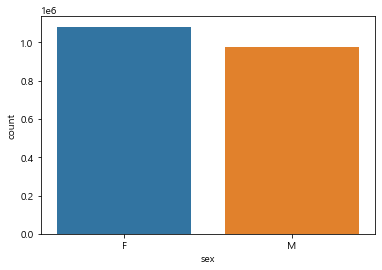

In [136]:
sns.countplot(buy_full.sex)

구매이력 데이터 개수는 `여성`이 `남성`보다 조금 더 많다.

* qty

In [86]:
buy_full.groupby(['sex','big_cat']).mean().reset_index()

,sex,big_cat,age,qty,year,month,day,weekday
0,F,냉난방가전,38.119018,9.726082,2018.513234,6.613263,15.700458,2.877360
1,F,뷰티,37.653073,29.517077,2018.508606,6.510119,15.706571,2.962672
2,F,식품,38.770880,24.524746,2018.509917,6.533537,15.730375,2.959418
3,M,냉난방가전,39.469058,8.151766,2018.511444,6.625334,15.702743,2.837557
4,M,뷰티,37.823528,10.773041,2018.511872,6.512653,15.686846,2.936411
5,M,식품,39.202294,13.377997,2018.513519,6.540116,15.714294,2.933727


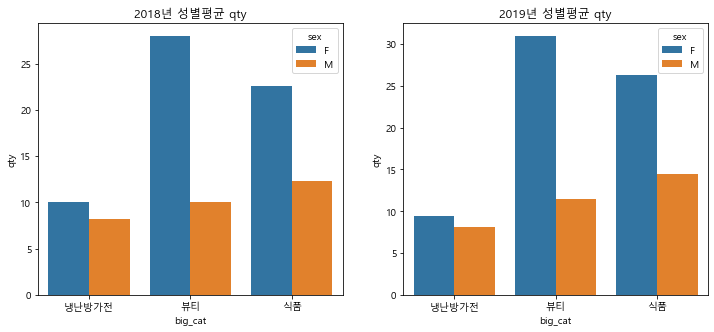

In [135]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(12,5)
years = [2018, 2019]
dat = buy_full.groupby(['sex', 'year', 'big_cat']).mean().reset_index()[['sex', 'year', 'big_cat', 'qty']]

for i in range(2):
    sns.barplot(x='big_cat', y='qty', hue='sex', data=dat[dat.year==years[i]], ax=axes[i])
    axes[i].set_title("{}년 성별평균 qty".format(years[i]))

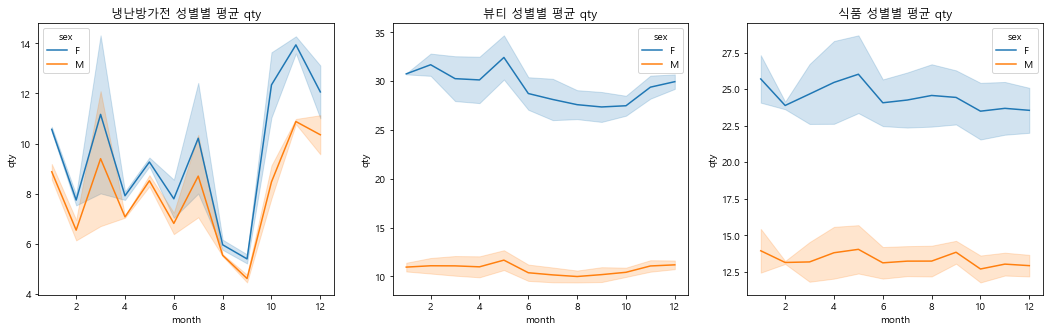

In [132]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(18,5)
dat = buy_full.groupby(['sex', 'year', 'month', 'big_cat']).mean().reset_index()[['sex', 'year', 'month', 'big_cat', 'qty']]

for i in range(3):
    sns.lineplot(x='month', y='qty', hue='sex', data=dat[dat.big_cat==dat.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 성별별 평균 qty".format(dat.big_cat[i]))

In [188]:
buy_full.describe()

,age,qty,year,month,day,weekday
count,2.056899e+06,2.056899e+06,2.056899e+06,2.056899e+06,2.056899e+06,2.056899e+06
mean,3.854287e+01,1.910340e+01,2.018511e+03,6.533251e+00,1.571280e+01,2.942652e+00
std,1.326657e+01,4.397234e+01,4.998755e-01,3.455739e+00,8.798752e+00,1.996704e+00
min,2.000000e+01,1.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.000000e+01,2.000000e+00,2.018000e+03,4.000000e+00,8.000000e+00,1.000000e+00
50%,4.000000e+01,6.000000e+00,2.019000e+03,7.000000e+00,1.600000e+01,3.000000e+00
75%,5.000000e+01,1.700000e+01,2.019000e+03,1.000000e+01,2.300000e+01,5.000000e+00
max,6.000000e+01,2.774000e+03,2.019000e+03,1.200000e+01,3.100000e+01,6.000000e+00


* `qty`기준 상위 10퍼센트 안에 속하는 데이터들 분석

In [196]:
top10per = np.quantile(buy_full['qty'], 0.9)
buy_top = buy_full[buy_full.qty>top10per]
buy_top.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,weekday
46,2018-01-01,F,20,식품,감귤/한라봉/오렌지,105,2018,1,1,0
47,2018-01-01,F,30,식품,감귤/한라봉/오렌지,179,2018,1,1,0
48,2018-01-01,F,40,식품,감귤/한라봉/오렌지,223,2018,1,1,0
49,2018-01-01,F,50,식품,감귤/한라봉/오렌지,104,2018,1,1,0
52,2018-01-01,M,30,식품,감귤/한라봉/오렌지,68,2018,1,1,0


C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

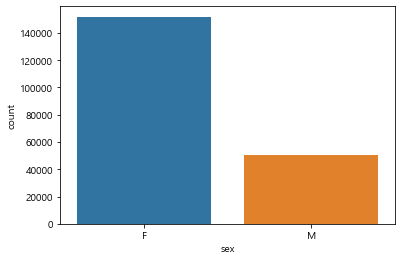

In [197]:
sns.countplot(buy_top.sex)

여성이 더 많은 비율 차지

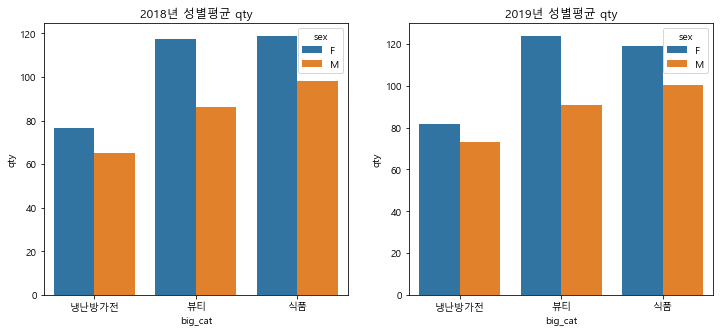

In [198]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(12,5)
years = [2018, 2019]
dat = buy_top.groupby(['sex', 'year', 'big_cat']).mean().reset_index()[['sex', 'year', 'big_cat', 'qty']]

for i in range(2):
    sns.barplot(x='big_cat', y='qty', hue='sex', data=dat[dat.year==years[i]], ax=axes[i])
    axes[i].set_title("{}년 성별평균 qty".format(years[i]))

성별간 격차가 줄어들었다. (뷰티, 식품등에서) → 하위 그룹에 해당되던 남성 데이터들이 사라져서 격차 자체는 줄어든듯

#### 연령별

* 자료개수

In [80]:
buy_full.age.value_counts()

30    476260
40    473038
50    414271
20    406097
60    287233
Name: age, dtype: int64

C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

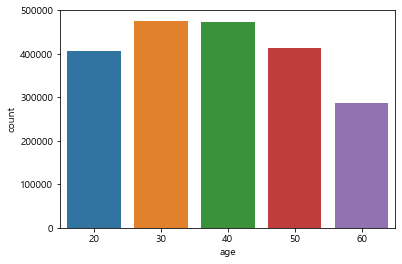

In [79]:
sns.countplot(buy_full.age)

구매이력 데이터 개수는 `30` -> `40` -> `50` -> `20` -> `60` 순으로 많다

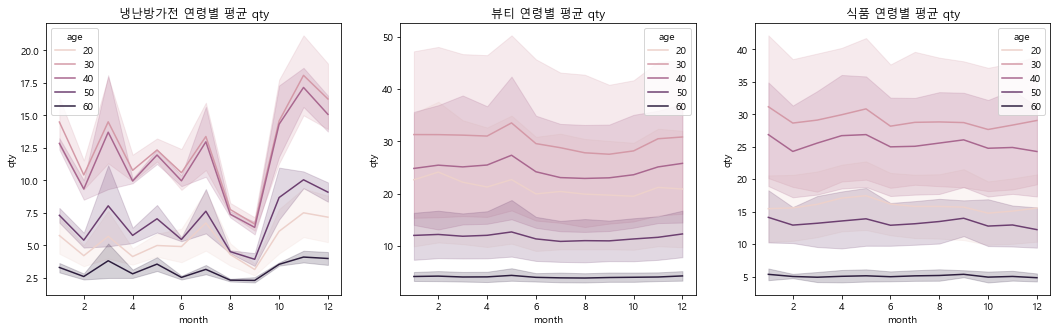

In [136]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(18,5)
dat = buy_full.groupby(['sex', 'age', 'year', 'month', 'big_cat']).mean().reset_index()[['sex', 'age', 'year', 'month', 'big_cat', 'qty']]

for i in range(3):
    sns.lineplot(x='month', y='qty', hue='age', data=dat[dat.big_cat==dat.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 연령별 평균 qty".format(dat.big_cat[i]))

* `qty`기준 상위 10퍼센트 안에 속하는 데이터들 분석

C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

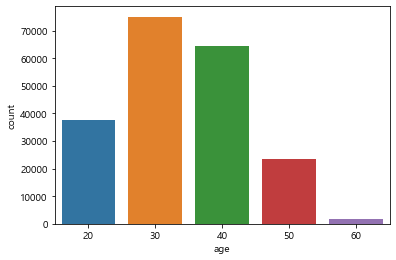

In [200]:
sns.countplot(buy_top.age)

성별간 데이터수 격차 또한 커졌으나 순위 자체는 변하지 않음. 60대 데이터 개수는 크게 감소

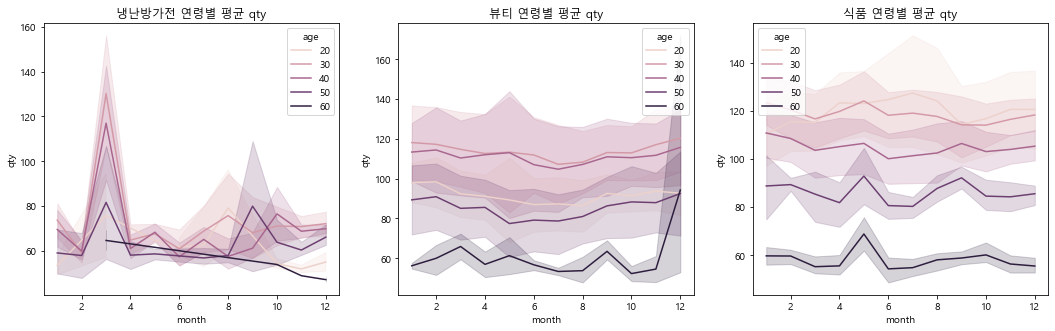

In [201]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(18,5)
dat = buy_top.groupby(['sex', 'age', 'year', 'month', 'big_cat']).mean().reset_index()[['sex', 'age', 'year', 'month', 'big_cat', 'qty']]

for i in range(3):
    sns.lineplot(x='month', y='qty', hue='age', data=dat[dat.big_cat==dat.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 연령별 평균 qty".format(dat.big_cat[i]))

#### 성연령별

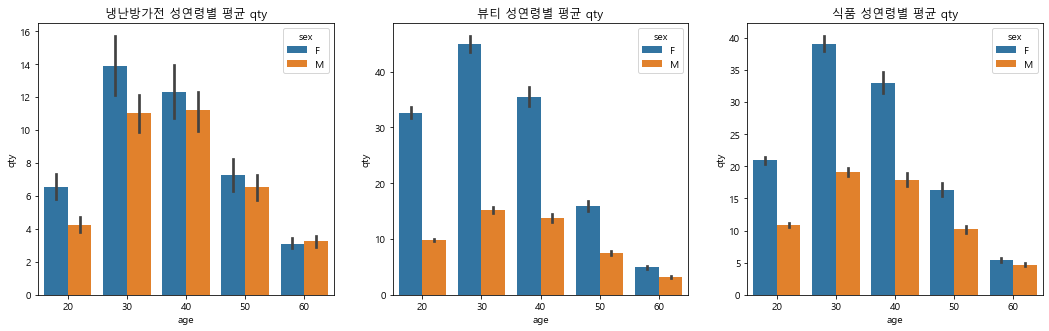

In [204]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(18,5)
dat = buy_full.groupby(['sex', 'age', 'year', 'month', 'big_cat']).mean().reset_index()[['sex', 'age', 'year', 'month', 'big_cat', 'qty']]

for i in range(3):
    sns.barplot(x='age', y='qty', hue='sex', data=dat[dat.big_cat==dat.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 성연령별 평균 qty".format(dat.big_cat[i]))

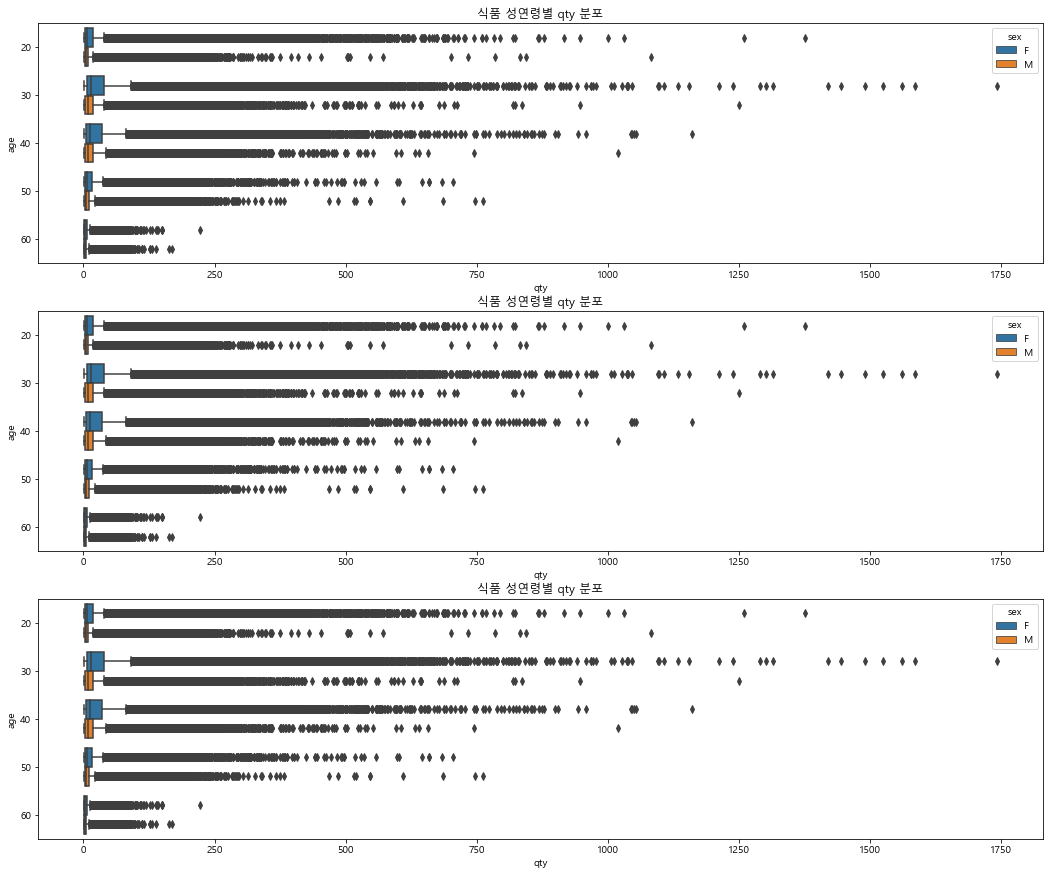

In [184]:
f, axes = plt.subplots(3, 1)
f.set_size_inches(18,15)
for i in range(3):
    sns.boxplot(data=buy_full[buy_full.big_cat==buy_full.big_cat[i]],y="age",x="qty",orient="h", hue='sex', ax=axes[i])
    axes[i].set_title("{} 성연령별 qty 분포".format(buy_full.big_cat[i]))

이상치 폭탄 ㅠ ㅠ

* `qty`기준 상위 10퍼센트 안에 속하는 데이터들 분석

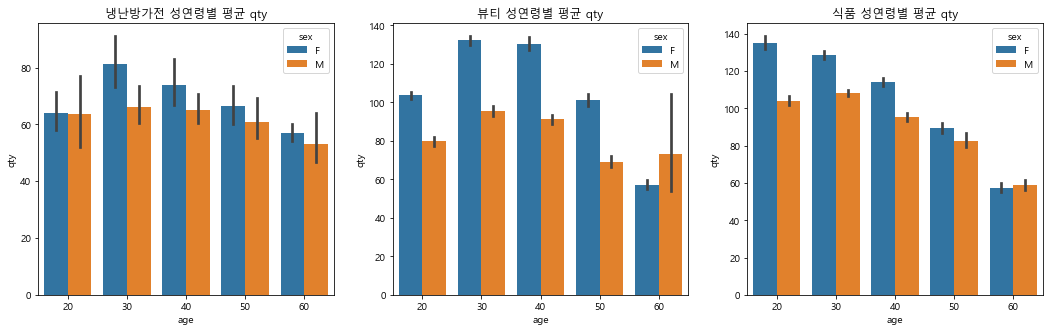

In [205]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(18,5)
dat = buy_top.groupby(['sex', 'age', 'year', 'month', 'big_cat']).mean().reset_index()[['sex', 'age', 'year', 'month', 'big_cat', 'qty']]

for i in range(3):
    sns.barplot(x='age', y='qty', hue='sex', data=dat[dat.big_cat==dat.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 성연령별 평균 qty".format(dat.big_cat[i]))

60대 남성의 뷰티, 식품 평균 qty가 상승함  
다들 뭐사셨지..

In [264]:
buy_top[(buy_top.age==60)&(buy_top.sex=='M')].sort_values(by='qty', ascending=False)[:50]

,date,sex,age,big_cat,sm_cat,qty,year,month,day,weekday
995852,2018-12-28,M,60,뷰티,색조 메이크업 립밤,172,2018,12,28,4
1435065,2019-05-29,M,60,식품,생수,168,2019,5,29,2
1353247,2019-05-01,M,60,식품,생수,163,2019,5,1,2
1414651,2019-05-22,M,60,식품,생수,139,2019,5,22,2
1373747,2019-05-08,M,60,식품,생수,131,2019,5,8,2
1362262,2019-05-04,M,60,식품,생수,127,2019,5,4,5
1394238,2019-05-15,M,60,식품,생수,127,2019,5,15,2
97851,2018-02-05,M,60,식품,곶감/반건시,116,2018,2,5,0
1188761,2019-03-06,M,60,냉난방가전,공기청정기,113,2019,3,6,2
1423633,2019-05-25,M,60,식품,생수,112,2019,5,25,5


In [233]:
buy_top[(buy_top.age==60)&(buy_top.sex=='M')].sort_values(by='qty', ascending=False).groupby('sm_cat').sum().sort_values(
    by='qty', ascending=False)['qty']

sm_cat
인스턴트커피         17586
생수             11629
쌀               1828
곶감/반건시          1320
감귤/한라봉/오렌지       915
한우육              882
홍삼액/홍삼정          450
프로바이오틱스          409
과일세트             313
공기청정기            229
홍삼/인삼 제품         196
히터               192
굴비/조기            190
색조 메이크업 립밤       172
두유               150
건어물 멸치           122
스킨케어 수면팩         121
공기정화 용품          117
샴푸               115
클렌징 폼            111
비타민              108
과채 음료/주스         104
색조 메이크업 립스틱       71
기초 화장용 크림         69
전복 생물             62
기초 화장용 스킨         60
토마토               54
견과류               50
Name: qty, dtype: int64

인스턴트커피, 생수, 쌀 등 생활 필수용품과 곶감, 귤, 건강식품등을 많이 사시는듯

#### 시간별

In [62]:
buy_full.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,datetime,weekday
0,2018-01-01,F,20,식품,가공란,37,2018,1,1,2018-01-01,0
1,2018-01-01,F,30,식품,가공란,16,2018,1,1,2018-01-01,0
2,2018-01-01,F,40,식품,가공란,9,2018,1,1,2018-01-01,0
3,2018-01-01,F,50,식품,가공란,3,2018,1,1,2018-01-01,0
4,2018-01-01,M,20,식품,가공란,13,2018,1,1,2018-01-01,0


Text(0.5, 1.0, '연평균 quantity')

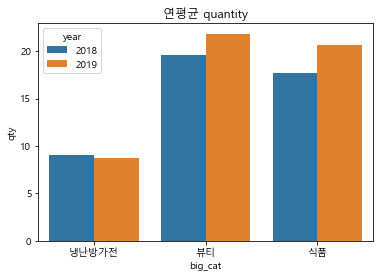

In [65]:
dat = buy_full.groupby(['year','big_cat']).mean().reset_index()[['year', 'big_cat', 'qty']]
sns.barplot(x='big_cat', y='qty', hue='year', data=dat)
plt.title('연평균 quantity')

* 월평균  
  월별로는 년도간 차이가 있어 보임

Text(0.5, 1.0, '2018-2019년 월평균 quantity')

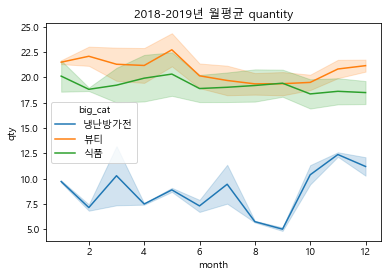

In [71]:
dat = buy_full.groupby(['year', 'weekday', 'big_cat']).mean().reset_index()[['year', 'month', 'big_cat', 'qty']]
sns.lineplot(x='month', y='qty', hue='big_cat', data=dat)
plt.title('2018-2019년 월평균 quantity')

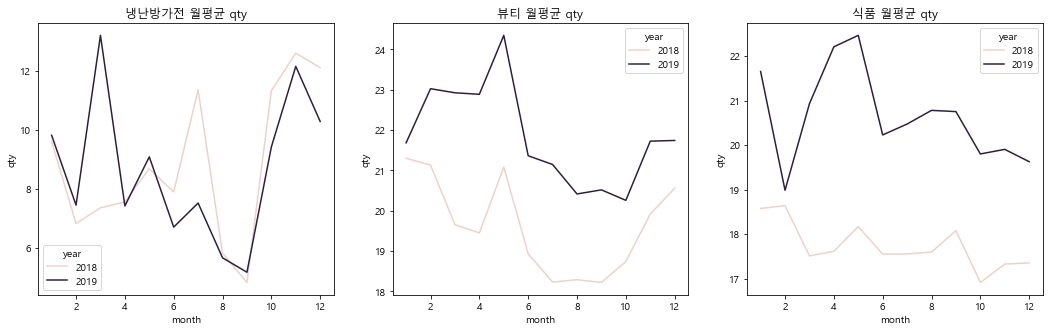

In [137]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(18,5)
dat = buy_full.groupby(['year', 'month', 'big_cat']).mean().reset_index()[['year', 'month', 'big_cat', 'qty']]
for i in range(3):
    sns.lineplot(x='month', y='qty', hue='year', data=dat[dat.big_cat==dat.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 월평균 qty".format(dat.big_cat[i]))

냉난방가전 : 3월, 7월에 2018/2019 간 큰 차이. (2019년 3월 > 2018년 3월. 2018년 7월 > 2019년 7월)  
뷰티 : 2019년이 항상 높았음  
식품 : 2019년이 항상 높았음

about 냉난방가전

In [220]:
buy_full[buy_full.big_cat=='냉난방가전'].describe()

,age,qty,year,month,day,weekday
count,129227.000000,129227.000000,129227.000000,129227.000000,129227.000000,129227.000000
mean,38.800019,8.931949,2018.512331,6.619352,15.701610,2.857282
std,12.793055,16.906094,0.499850,3.492607,8.807066,1.979787
min,20.000000,1.000000,2018.000000,1.000000,1.000000,0.000000
25%,30.000000,1.000000,2018.000000,4.000000,8.000000,1.000000
50%,40.000000,3.000000,2019.000000,7.000000,16.000000,3.000000
75%,50.000000,9.000000,2019.000000,10.000000,23.000000,5.000000
max,60.000000,657.000000,2019.000000,12.000000,31.000000,6.000000


In [221]:
buy_full[(buy_full.month==2)&(buy_full.big_cat=='냉난방가전')].sort_values(by='qty', ascending=False)[:50]

,date,sex,age,big_cat,sm_cat,qty,year,month,day,weekday
1171475,2019-02-28,F,30,냉난방가전,공기청정기,161,2019,2,28,3
1171476,2019-02-28,F,40,냉난방가전,공기청정기,132,2019,2,28,3
1171480,2019-02-28,M,30,냉난방가전,공기청정기,110,2019,2,28,3
1113517,2019-02-08,F,30,냉난방가전,공기청정기,103,2019,2,8,4
1131012,2019-02-14,F,40,냉난방가전,공기정화 용품,99,2019,2,14,3
161504,2018-02-28,F,30,냉난방가전,온열매트,98,2018,2,28,2
103734,2018-02-07,F,40,냉난방가전,공기청정기,95,2018,2,7,2
103733,2018-02-07,F,30,냉난방가전,공기청정기,92,2018,2,7,2
1112257,2019-02-07,M,40,냉난방가전,온열매트,87,2019,2,7,3
157074,2018-02-27,F,30,냉난방가전,공기정화 용품,86,2018,2,27,1


2월말 명절시기에 냉난방가전이 많이 판매되는듯 (참고로 Q3가 9니까 되게 높은 편!)

* 요일평균  
  요일별로는 큰 차이 없는 듯?

Text(0.5, 1.0, '요일평균 quantity')

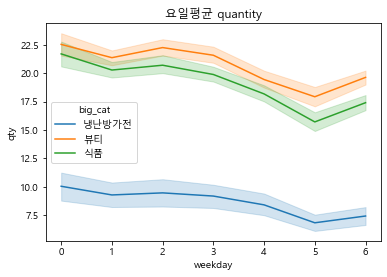

In [75]:
dat = buy_full.groupby(['year', 'month', 'weekday', 'big_cat']).mean().reset_index()[['year', 'month', 'weekday', 'big_cat', 'qty']]
sns.lineplot(x='weekday', y='qty', hue='big_cat', data=dat)
plt.title('요일평균 quantity') # 0부터 월요일...

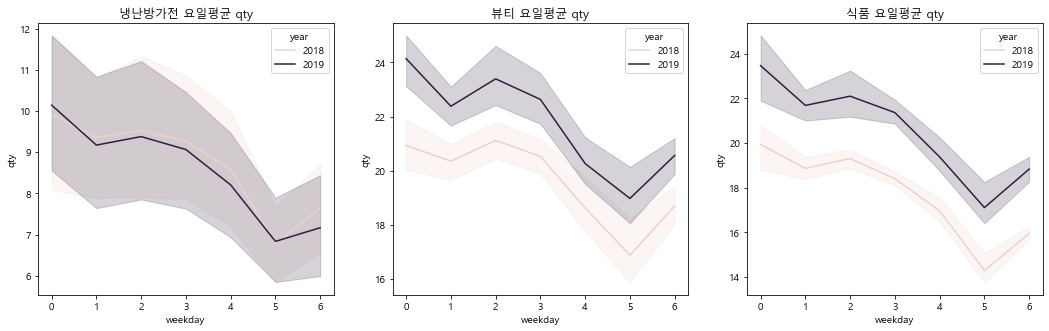

In [138]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(18,5)
dat = buy_full.groupby(['year', 'month', 'weekday', 'big_cat']).mean().reset_index()[['year', 'month', 'weekday', 'big_cat', 'qty']]
for i in range(3):
    sns.lineplot(x='weekday', y='qty', hue='year', data=dat[dat.big_cat==dat.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 요일평균 qty".format(dat.big_cat[i]))

토요일 판매량이 많지 않고, 일요일부터 월요일까지 상승했다가 다시 하락하는 추세

#### 소분류별

* 전체 데이터  
데이터 개수가 항목별로 모두 같지는 않다

In [185]:
buy_full.sm_cat.value_counts()

생수            7300
인스턴트커피        7300
기초 화장용 크림     7300
두유            7300
샴푸            7300
              ... 
중대형 에어컨        119
산림욕기           105
남성향수            76
색조 메이크업 세트      76
여성향수            11
Name: sm_cat, Length: 383, dtype: int64

* top 10% 데이터

In [210]:
buy_top.head()

,date,sex,age,big_cat,sm_cat,qty,year,month,day,weekday
46,2018-01-01,F,20,식품,감귤/한라봉/오렌지,105,2018,1,1,0
47,2018-01-01,F,30,식품,감귤/한라봉/오렌지,179,2018,1,1,0
48,2018-01-01,F,40,식품,감귤/한라봉/오렌지,223,2018,1,1,0
49,2018-01-01,F,50,식품,감귤/한라봉/오렌지,104,2018,1,1,0
52,2018-01-01,M,30,식품,감귤/한라봉/오렌지,68,2018,1,1,0


In [208]:
buy_top.sm_cat.unique()

array(['감귤/한라봉/오렌지', '감자', '건어물 마른오징어', '견과류', '과채 음료/주스', '기능성 아이케어 화장품',
       '기초 화장용 로션', '기초 화장용 스킨', '기초 화장용 에센스', '기초 화장용 오일/앰플',
       '기초 화장용 크림', '기타 주스류', '낙지', '네일 메이크업 용품', '다이어트보조식', '닭가슴살',
       '돼지 곱창', '두유', '딸기/복분자/블루베리', '루테인/눈 영양제', '메이크업 브러쉬', '밀크티/티라떼',
       '바나나/파인애플/망고', '바디 보습제', '바디 스크럽', '바디 클렌져', '배/포도/과일즙',
       '베이스 메이크업용 쿠션팩트', '베이스 메이크업용 파운데이션', '비타민', '색조 메이크업 립밤',
       '색조 메이크업 립스틱', '색조 메이크업 립틴트', '색조 메이크업 볼터치', '색조 메이크업 아이라이너',
       '색조 메이크업 아이브로우', '색조 메이크업 아이섀도우', '생수', '샴푸', '선크림', '수산 생물',
       '스킨케어 마스크팩', '스킨케어 시트마스크팩', '쌀', '어린이영양제', '오메가3/스쿠알렌 영양제',
       '요거트/발효유', '유제품 음료', '인스턴트커피', '전통차', '조개', '초음파식 가습기', '초코우유',
       '카페 푸드', '칼슘/철분 영양제', '캡슐/POD커피', '커피음료', '콜라겐/코큐텐 영양제', '클렌징 오일',
       '클렌징 폼', '탄산수', '탄산음료', '트리트먼트', '프로바이오틱스', '한방 분말/환제품', '한우육',
       '핸드크림', '헤어스타일링용 염색약', '헤어에센스', '홍삼액/홍삼정', '화장 비누', '화장 퍼프', '회',
       '흰우유', '견과류 밤', '고등어', '공기정화 용품', '기초 화장용 미스트', '기타 농산물', '김치류',
       '린스', '배추김치', '베이스

In [209]:
len(buy_top.sm_cat.unique())

294

C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

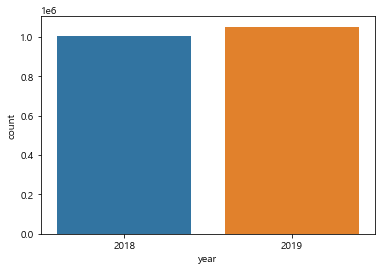

In [213]:
sns.countplot(buy_full.year)

2019년에 근소하게 더 많음

C:\ProgramData\Anaconda3\envs\tensorflow2_py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='count'>

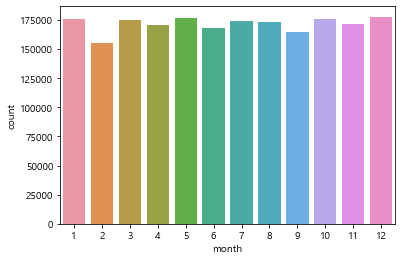

In [214]:
sns.countplot(buy_full.month)

월별로도 2월과 9월을 제외하면 거의 비슷함. 두 시기 모두 큰 명절(설날, 추석)이 존재하는 시기!

### SNS 데이터

In [252]:
sns_full.head()

,date,big_cat,sm_cat,cnt,year,month,day
0,2018-01-01,뷰티,기능성 링클케어 화장품,12.154295,2018,0,1
1,2018-01-01,뷰티,기능성 모공관리 화장품,36.000828,2018,0,1
2,2018-01-01,뷰티,기능성 아이케어 화장품,0.895782,2018,0,1
3,2018-01-01,뷰티,기능성 영양보습 화장품,14.868175,2018,0,1
4,2018-01-01,뷰티,기능성 트러블케어 화장품,48.819391,2018,0,1


In [133]:
sns_full.big_cat.value_counts()

식품       154760
뷰티        95630
냉난방가전     29200
Name: big_cat, dtype: int64

Text(0.5, 1.0, '대분류별 총언급량')

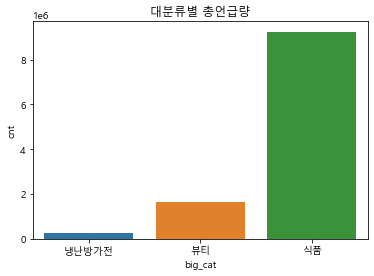

In [148]:
dat = sns_full.groupby(['big_cat']).sum().reset_index()[['big_cat', 'cnt']]
sns.barplot(data=dat, x='big_cat', y='cnt')
plt.title('대분류별 총언급량')

`식품` → `뷰티` → `냉난방가전` 순!

Text(0.5, 1.0, '대분류별 문서당 평균 언급량')

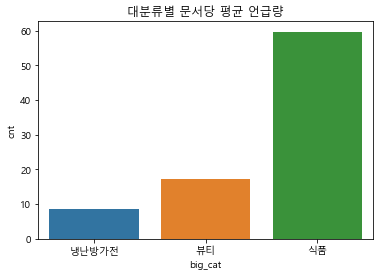

In [151]:
dat = sns_full.groupby(['big_cat']).mean().reset_index()[['big_cat', 'cnt']]
sns.barplot(data=dat, x='big_cat', y='cnt')
plt.title('대분류별 문서당 평균 언급량')

In [245]:
sns_full.groupby('sm_cat').sum().reset_index().sort_values(by='cnt', ascending=False)[:100].sm_cat.unique()

array(['오이/가지', '무/배추', '김치류', '딸기/복분자/블루베리', '감/홍시', '마/야콘', '반찬류',
       '파/양파', '바나나/파인애플/망고', '새우/대하', '레몬/자몽', '계란', '회', '견과류 잣/은행',
       '기타 한방/환제품', '감자', '고추/피망/파프리카', '비타민', '감귤/한라봉/오렌지', '마늘/생강',
       '굴비/조기', '토마토', '쌀', '오징어', '포도/거봉/체리', '연어/훈제연어', '참외/메론/수박',
       '콩나물/숙주', '기초 화장용 로션', '샴푸', '카페 푸드', '요거트/발효유', '기타 주스류',
       '윙봉/닭다리/날개', '에이드', '기능성 트러블케어 화장품', '한우육', '나물', '녹차', '옥수수',
       '닭가슴살', '밀크티/티라떼', '양배추/양상추', '기능성 모공관리 화장품', '공기청정기', '기초 화장용 크림',
       '조개', '호박', '전복 생물', '건어물 멸치', '기초 화장용 에센스', '견과류 땅콩', '고등어',
       '색조 메이크업 립스틱', '차 선물세트', '헤어스타일링용 펌제', '네일컬러', '견과류 호두', '문어',
       '굴 생물', '낙지', '선크림', '캡슐/POD커피', '보일러', '장어', '소고기 육회',
       '스킨케어 마스크팩', '네일케어', '부추', '히터', '기초 화장용 오일/앰플', '기능성 화이트닝 화장품',
       '시금치', '게장류', '색조 메이크업 립틴트', '음용 식초', '견과류', '갈치', '차/곡물 음료',
       '남성 스킨', '대게/킹크랩', '헤어스프레이', '생수', '두유', '해조류 미역', '기초 화장용 미스트',
       '브로콜리/셀러리', '헤어왁스', '인삼/수삼/산삼', '숙취/에너지/건강 음료', '코코아/핫초코', '트리트먼트',
       '홍차', '네일아트'

언급횟수가 많은 순서대로 정렬했을 때 오이가 가장 많았음..  
그리고 그 외 식품관련 단어가 많이 언급되었네요... 

In [ ]:
sns.lineplot(data=buy_2019[b])

In [ ]:
sns.lineplot(data=buy_full[(buy_full.big_cat=='식품')&(buy_full.sm_cat=='오이/가지')], x='date', y='qty', hue='sm_cat')

<AxesSubplot:xlabel='date', ylabel='qty'>

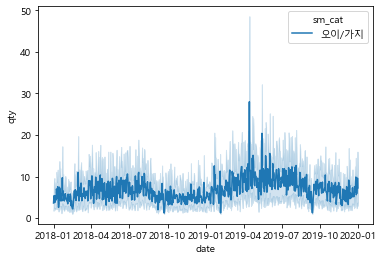

In [269]:
sns.lineplot(data=buy_full[(buy_full.big_cat=='식품')&(buy_full.sm_cat=='오이/가지')], x='date', y='qty', hue='sm_cat')

KeyboardInterrupt: 

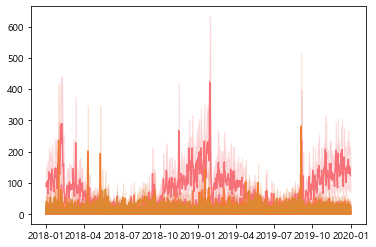

In [266]:
sns.lineplot(data=buy_full, x='date', y='qty', hue='sm_cat')

In [270]:
buy_full

,date,sex,age,big_cat,sm_cat,qty,year,month,day,weekday
0,2018-01-01,F,20,식품,가공란,37,2018,1,1,0
1,2018-01-01,F,30,식품,가공란,16,2018,1,1,0
2,2018-01-01,F,40,식품,가공란,9,2018,1,1,0
3,2018-01-01,F,50,식품,가공란,3,2018,1,1,0
4,2018-01-01,M,20,식품,가공란,13,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2056894,2019-12-31,M,20,냉난방가전,히터,8,2019,12,31,1
2056895,2019-12-31,M,30,냉난방가전,히터,22,2019,12,31,1
2056896,2019-12-31,M,40,냉난방가전,히터,38,2019,12,31,1
2056897,2019-12-31,M,50,냉난방가전,히터,23,2019,12,31,1
